# **MNIST Digit Recognition**

The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning. The goal is to take an image of a handwritten single digit, and determine what that digit is.


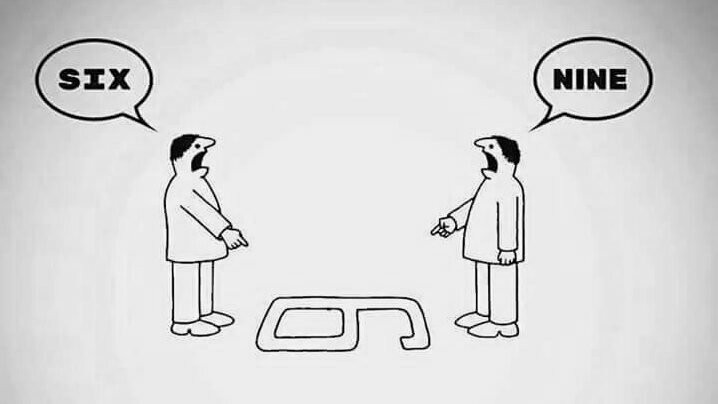

# **Importing libraries**

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPool2D, Dropout 
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# **Reading dataset**

In [9]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

# **Checking for null values**

In [10]:
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

# **Count of digits per class (0-9)**

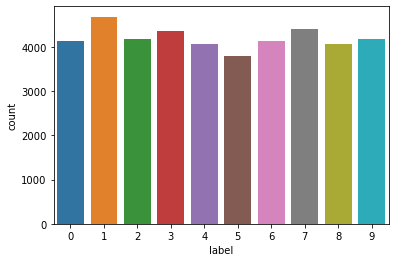

In [12]:
count_plot = sns.countplot(train_data['label'])

# **Dependent feature (y) and independent features (X)**

In [13]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]
test_X = test_data

# **Splitting into training and validation set**

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# **Changing datatype to float for normalization purpose**

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
test_X = test_X.astype('float32')

# **Normalization**

each pixel will have value between 0 to 1 when divided by 255

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0 
test_X = test_X / 255.0

# **Converting into numpy arrays**

In [17]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
test_X = test_X.to_numpy()

# **Reshaping the arrays into arrays of 28x28 with one channel**

In [18]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

# **Converting categorical labels to one hot encoded labels**

In [19]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# **Creating a CNN**

In [20]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt = Adam()

model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics=['accuracy'])

# **Structure of our CNN model**

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

# **Image data augmentation**

In [22]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest',  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

# **Training the model**

In [24]:
fit_model = model.fit(datagen.flow(X_train,Y_train, batch_size=512),
                              epochs = 5, validation_data = (X_test,Y_test),
                              verbose = 2)

Epoch 1/5
66/66 - 208s - loss: 0.2550 - accuracy: 0.9164 - val_loss: 0.1817 - val_accuracy: 0.9377
Epoch 2/5
66/66 - 214s - loss: 0.2462 - accuracy: 0.9206 - val_loss: 0.1687 - val_accuracy: 0.9449
Epoch 3/5
66/66 - 208s - loss: 0.2312 - accuracy: 0.9251 - val_loss: 0.1508 - val_accuracy: 0.9514
Epoch 4/5
66/66 - 209s - loss: 0.2301 - accuracy: 0.9241 - val_loss: 0.1341 - val_accuracy: 0.9560
Epoch 5/5
66/66 - 213s - loss: 0.2259 - accuracy: 0.9261 - val_loss: 0.1427 - val_accuracy: 0.9521


# **Plotting training and validation accuracy vs number of epochs**

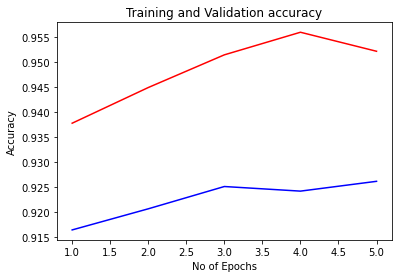

In [25]:
acc = fit_model.history['accuracy']
val_acc = fit_model.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'blue')
plt.xlabel('No of Epochs')
plt.plot(epochs, val_acc, 'red')
plt.ylabel('Accuracy')
plt.show()

# **Performing prediction on test data**

In [26]:
ypred = model.predict_classes(test_X>0.5)

# **Output dataframe**

In [27]:
results = pd.Series(ypred,name='Label')
output = pd.concat([pd.Series(range(1,28001),name = 'ImageId'),results],axis = 1)
output.to_csv('digit_recognizer.csv',index=False)